# Twitter Sentiment Analysis

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv


## Importing the Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the Dataset

In [3]:
dataset_cols = ["target", "ids", "date", "flag", "user", "text"]
dataset = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv', header=None, encoding='ISO-8859-1', names=dataset_cols)

## Cleaning the text

In [4]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

def preprocess(text):
  review = re.sub('[^a-zA-Z]',' ',text) 
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  return ' '.join(review)

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [5]:
dataset.text = dataset.text.apply(lambda x: preprocess(x))

In [6]:
print(dataset.head())

   target         ids                          date      flag  \
0       0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  switchfoot http twitpic com zl awww bummer sho...  
1    scotthamilton  upset updat facebook text might cri result sch...  
2         mattycus  kenichan dive mani time ball manag save rest g...  
3          ElleCTF                    whole bodi feel itchi like fire  
4           Karoli                  nationwideclass not behav mad see  


## Encoding categorical data   

In [7]:
from sklearn.preprocessing import LabelEncoder
y = dataset.target
le = LabelEncoder()
y = le.fit_transform(y)

## Splitting the dataset into Training and Test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.text, y, test_size = 0.20, random_state = 0)

## Bag of Words Model

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=600)
X_train_dtm = cv.fit_transform(X_train).toarray()

In [11]:
X_test_dtm = cv.transform(X_test).toarray()

## Training the Logistic Regression model on the Training set

In [12]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_dtm, y_train) 

LogisticRegression(random_state=0)

## Predicting Test set results

In [13]:
y_pred = classifier.predict(X_test_dtm)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 0]
 ...
 [1 1]
 [1 1]
 [1 0]]


## Making the Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[110237  49578]
 [ 34897 125288]]


0.736015625

              precision    recall  f1-score   support

           0       0.76      0.69      0.72    159815
           1       0.72      0.78      0.75    160185

    accuracy                           0.74    320000
   macro avg       0.74      0.74      0.74    320000
weighted avg       0.74      0.74      0.74    320000



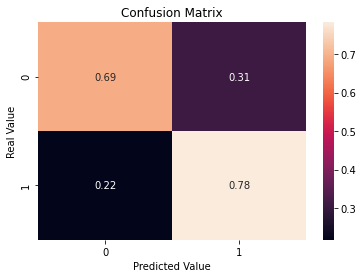

In [15]:
import seaborn as sns
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix')
ax.set_ylabel('Real Value')
ax.set_xlabel('Predicted Value')

plt.show()